 * **PROBLEM Statement**

 > Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

 > They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [2]:
!gdown 1kJLqsVF5Yr-FKaZmMi7dyOl0YJ3DRqUw

Downloading...
From: https://drive.google.com/uc?id=1kJLqsVF5Yr-FKaZmMi7dyOl0YJ3DRqUw
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 7.25MB/s]


In [3]:
!ls


Jamboree_Admission.csv	sample_data


In [4]:
import os

# List files in the current directory
files_in_directory = os.listdir('.')
print(files_in_directory)

# Assuming 'Jamboree_Admission.csv' is the file you want and it's in the list
csv_file_name = None
for file_name in files_in_directory:
    if file_name.endswith('.csv'):
        csv_file_name = file_name
        break

if csv_file_name:
    print(f"Reading data from: {csv_file_name}")
    df = pd.read_csv(csv_file_name)
    display(df.head())
else:
    print("No CSV file found in the directory.")

['.config', 'Jamboree_Admission.csv', 'sample_data']
Reading data from: Jamboree_Admission.csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Data Preprocessing

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


* No Null Values detected in the dataset

In [7]:
# Clean column names (strip extra spaces)
df.columns=df.columns.str.strip()

# Drop Serial No.
df.drop(['Serial No.'],axis=1,inplace=True)

# Separate features and target
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']


In [8]:
# Optional: Verify datatypes
print(X.dtypes)


GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
dtype: object


In [9]:
df.shape

(500, 8)

# 3. Exploratory Data Analysis (EDA)

## Non-graphical analysis

Perform non-graphical analysis to understand the central tendency, dispersion, and shape of the data using methods like descriptive statistics and correlation matrices.



Calculate and display descriptive statistics and the correlation matrix to understand the central tendency, dispersion, and relationships between variables.



In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


 * No strong indications of significant outliers in any of the columns.

 * The SOP and LOR columns show slightly wider ranges at the extremes compared to their interquartile ranges, which might warrant further investigation with visualizations like box plots to confirm if there are any true outliers.

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

print("\nCorrelation Matrix:")
display(correlation_matrix)


Correlation Matrix:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Graphical analysis

Creating visualizations such as histograms, box plots, and scatter plots to explore the distribution of individual variables and the relationships between them.


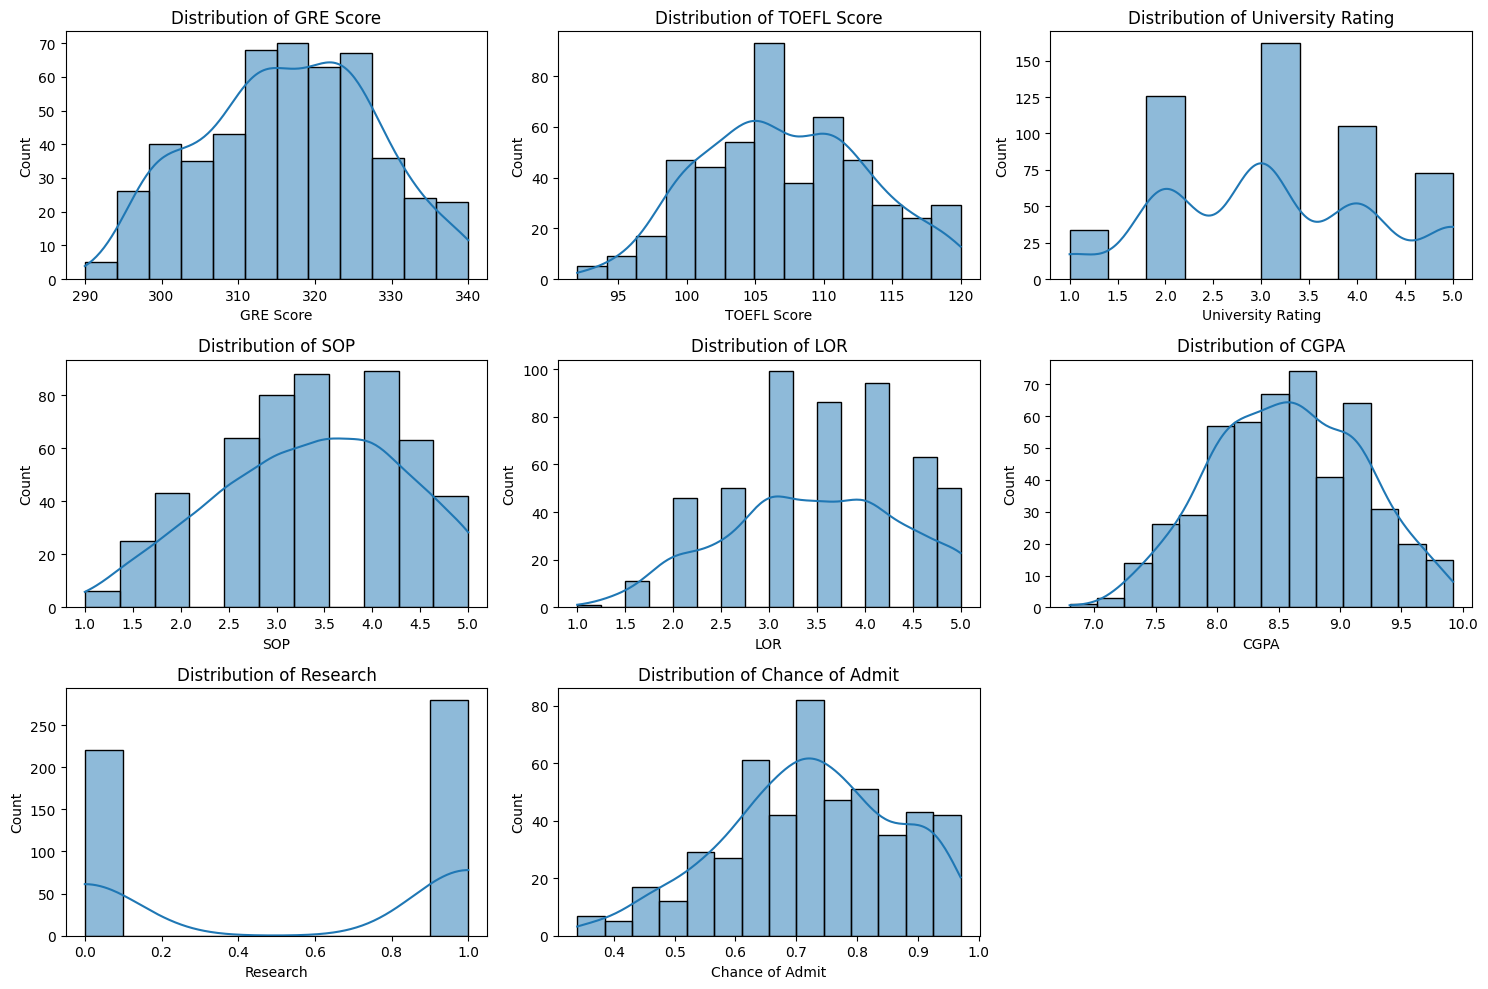

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

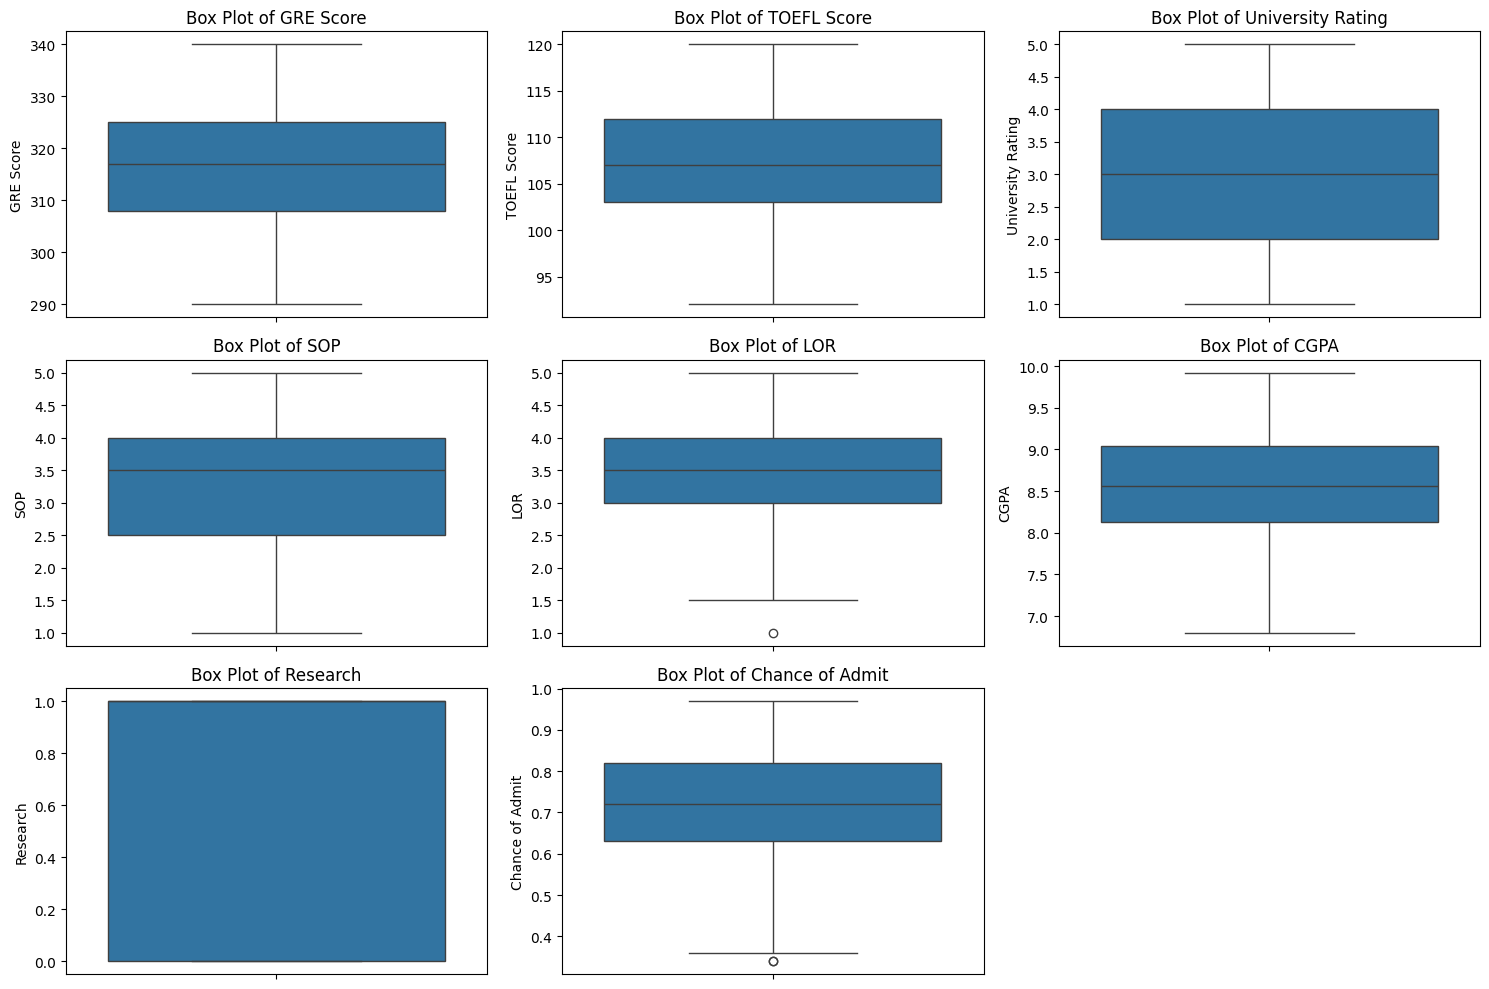

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

📊 Box Plot Insights:
1. GRE Score -Symmetric distribution ,
No major outliers
2. TOEFL Score -Slightly left-skewed,No extreme outliers
3. University Rating -Uniform spread, discrete values (1–5),Ordinal, fine for linear regression
4. SOP & LOR -Slight left-skew in SOP,LOR has a possible outlier at 1
⚠️ Minor concern: can consider capping the outlier if needed (optional)
5. CGPA -Slightly right-skewed, few low outliers,Still strong predictor, no need to treat unless it worsens performance
6. Research -Binary variable (0 or 1), fine


In [14]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


scatter plots to visualize the relationships between 'Chance of Admit' and the other numerical features.



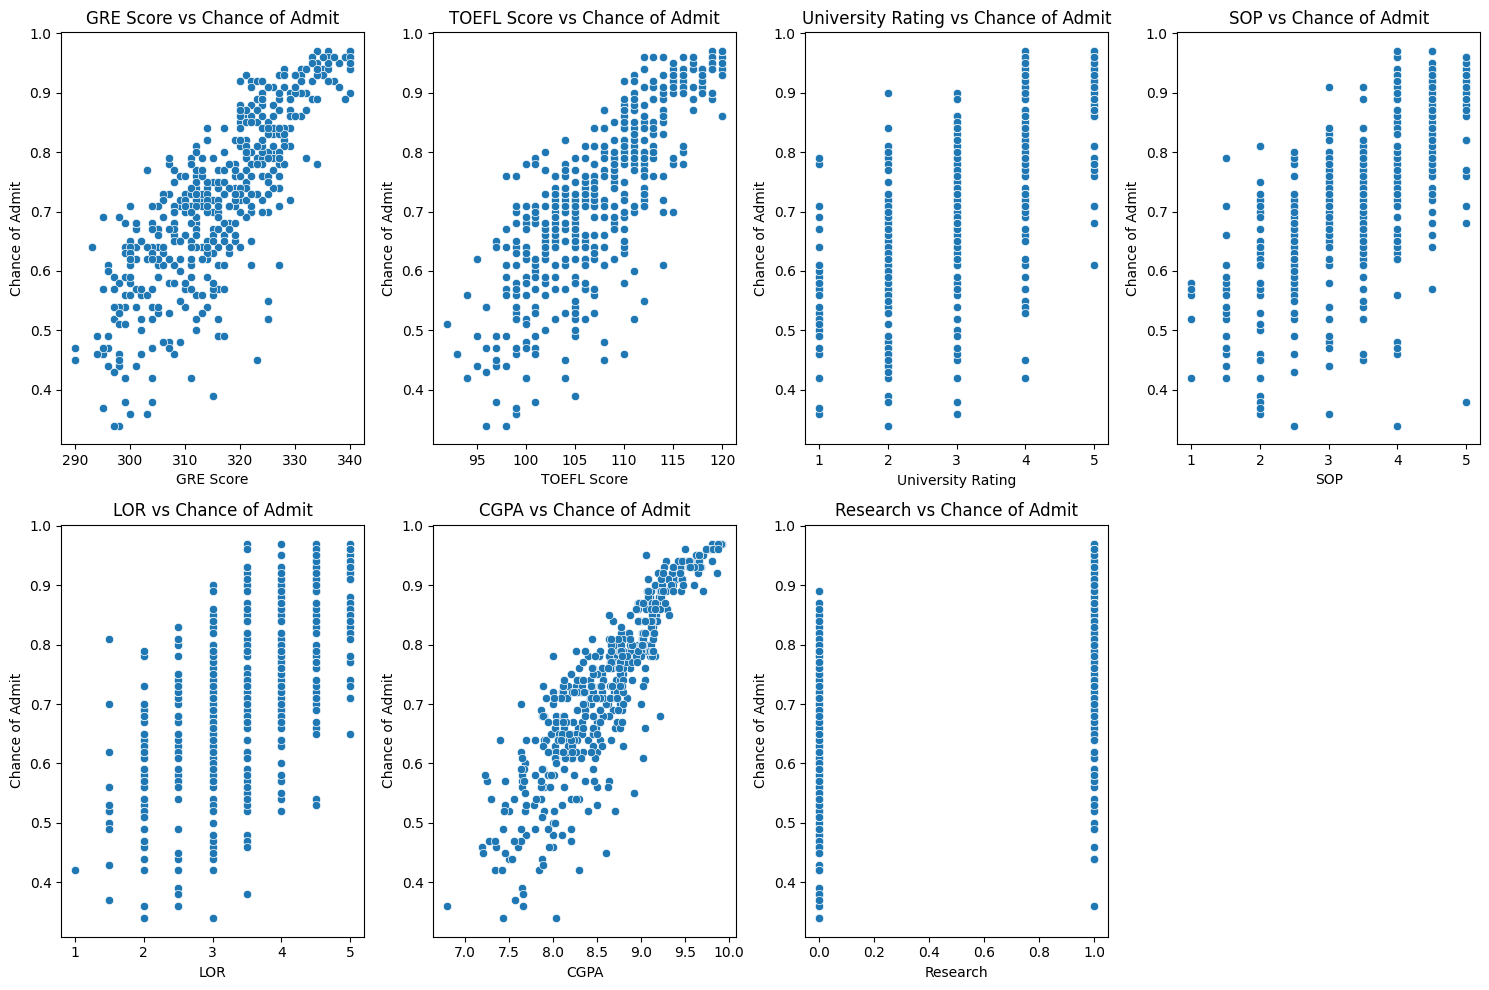

In [15]:
numerical_cols = df.select_dtypes(include=np.number).columns
feature_cols = numerical_cols.drop('Chance of Admit')

plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 4, i + 1)
    sns.scatterplot(x=df[col], y=df['Chance of Admit'])
    plt.title(f'{col} vs Chance of Admit')
plt.tight_layout()
plt.show()

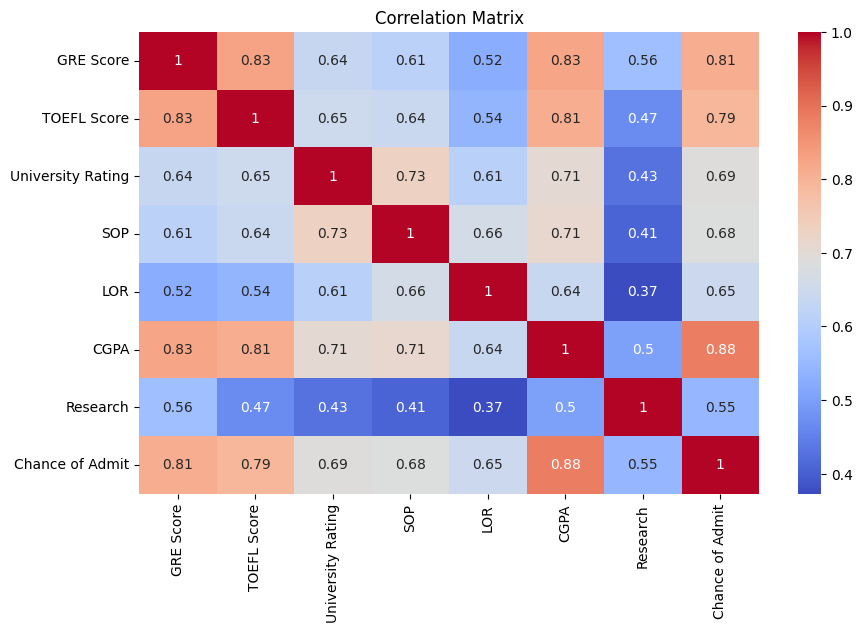

In [16]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Summary:

> Data Analysis Key Findings

*   Non-graphical analysis revealed that "Chance of Admit" has a central tendency around 0.72 with a standard deviation of 0.14.
*   Strong positive correlations were observed between "Chance of Admit" and "CGPA" (0.88), "GRE Score" (0.81), and "TOEFL Score" (0.79), indicating that higher scores in these areas are associated with a higher chance of admission.
*   Graphical analysis showed that the distributions of "Chance of Admit" and "CGPA" are left-skewed, while "GRE Score" and "TOEFL Score" appear approximately normally distributed.
*   Box plots identified potential outliers on the lower end for "Chance of Admit" and "LOR".
*   Scatter plots visually confirmed the strong positive linear relationships between "Chance of Admit" and "CGPA", "GRE Score", and "TOEFL Score".
* University Rating, SOP, and LOR are ordinal (e.g., values from 1–5), you can leave them as-is for linear regression. No need for one-hot encoding unless you're using a model that benefits from it.


> Insights or Next Steps

*   Academic metrics (CGPA, GRE, TOEFL) are the most significant predictors of admission chance.
*   Further investigation into the potential outliers in "Chance of Admit" and "LOR" could provide additional insights.


# 4. Model Building - Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit scaler only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Use same scaler to transform test data
X_test_scaled = scaler.transform(X_test)


* Train the Linear Regression Model

In [36]:
# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

* Make Predictions

In [28]:
y_pred=lr.predict(X_test_scaled)
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

# 5. Model Evaluation

* R² Score (Coefficient of Determination)

In [29]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8188432567829627


In [30]:
#Adjusted R² Function
def adjusted_r2(r2, n, k):
    """
    r2: R² Score
    n: number of observations
    k: number of independent variables (features)
    """
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))


* Adjusted R² Score

In [31]:
r2= r2_score(y_test, y_pred)
n = X_test.shape[0]   # Number of observations (rows in test set)
k = X_test.shape[1]   # Number of features (columns)
adj_r2 = adjusted_r2(r2, n, k)

print("Adjusted R² Score:", adj_r2)


Adjusted R² Score: 0.8050595915381881


* RMSE / MSE (Root Mean Squared Error / Mean Squared Error)/MAE

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 0.0037046553987884136
RMSE: 0.06086588041578314
MAE: 0.0427226542770537


* Cross-Validation

In [33]:
from sklearn.model_selection import cross_val_score

# Step 1: Scale the full feature set (only for cross-validation)
scaler_cv = StandardScaler()
X_scaled = scaler_cv.fit_transform(X)  # X is your full feature set (not split)

# Step 2: Initialize and cross-validate the model
lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')

# Step 3: Print results
print("CV R² scores:", scores)
print("Mean R²:", scores.mean())

CV R² scores: [0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]
Mean R²: 0.8108015220863886


#  6. Model Interpretation and Assumptions of Linear Regression (OLS)

* Interpret Coefficients

In [37]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                   Coefficient
CGPA                  0.067581
GRE Score             0.026671
TOEFL Score           0.018226
LOR                   0.015866
Research              0.011940
University Rating     0.002940
SOP                   0.001788


1. **Visualize Actual vs Predicted(Linearity Check)**

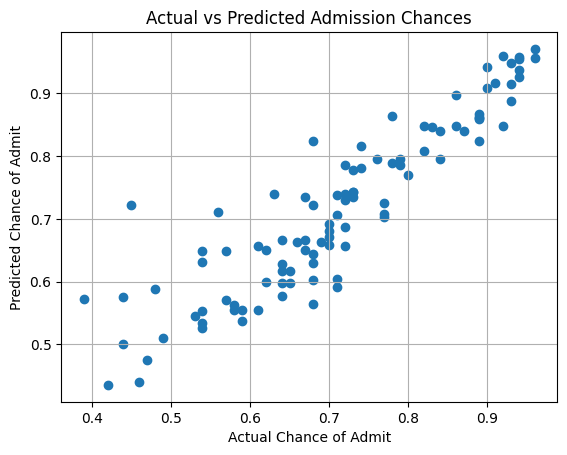

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Admission Chances")
plt.grid()
plt.show()


* A roughly diagonal line means linearity holds.

2. **VIF(No Multicollinearity)**

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = pd.DataFrame(X_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


             Feature       VIF
5               CGPA  4.777992
0          GRE Score  4.464249
1        TOEFL Score  3.904213
3                SOP  2.835210
2  University Rating  2.621036
4                LOR  2.033555
6           Research  1.494008


VIF < 5 for all features are safe.

3. **Residuals Plot (**Homoscedasticity**)**

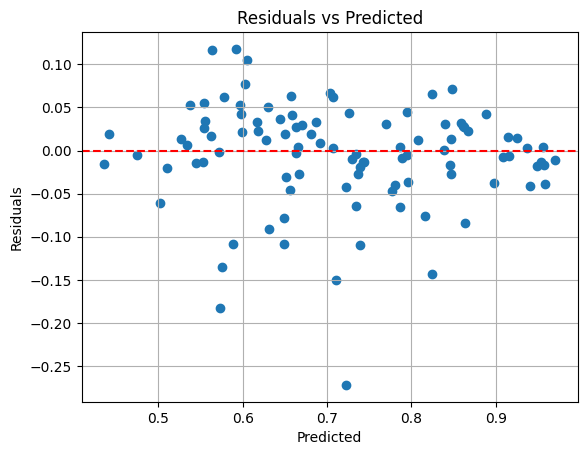

In [40]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid()
plt.show()


4. **Normality of Residuals**

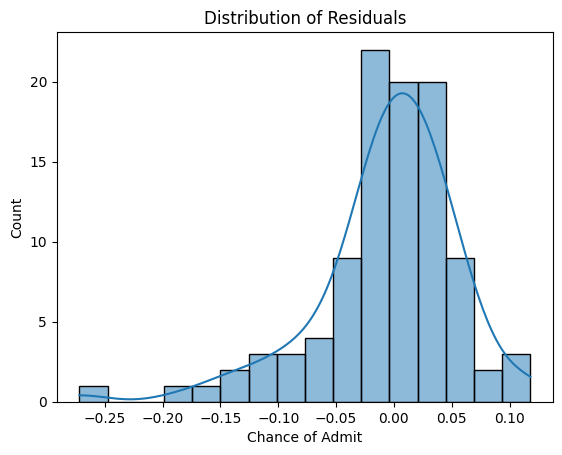

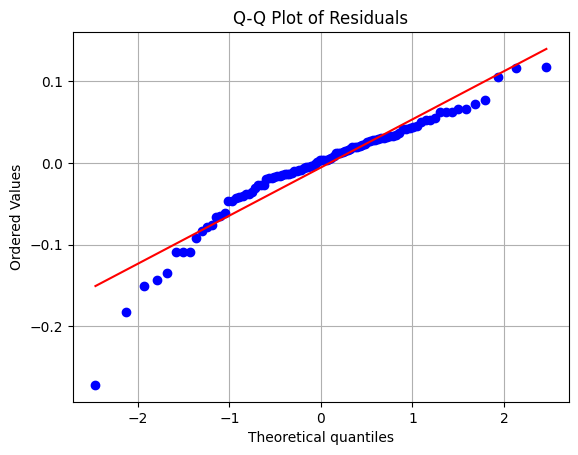

In [41]:

import scipy.stats as stats
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


✅ Histogram looks bell-shaped
✅ Q-Q plot points lies near the diagonal line

5. **Independence of Errors**

In [42]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.23879966743785


As Durbin-Watson statistic~2 ✅ No autocorrelation

# 7. Optional Enhancements

* Ridge/Lasso (to handle multicollinearity or feature selection)

In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [44]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_ridge_pred = ridge.predict(X_test_scaled)

print("🔵 Ridge Regression:")
print("R² Score:", r2_score(y_test, y_ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))


🔵 Ridge Regression:
R² Score: 0.8187885396675396
RMSE: 0.06087507177653933


In [45]:
lasso = Lasso(alpha=0.01)  # Start small for Lasso
lasso.fit(X_train_scaled, y_train)

y_lasso_pred = lasso.predict(X_test_scaled)

print("\n🟠 Lasso Regression:")
print("R² Score:", r2_score(y_test, y_lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso_pred)))



🟠 Lasso Regression:
R² Score: 0.8139953985227918
RMSE: 0.06167490656830304


In [46]:
# Comparing Coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

print(coeffs.sort_values(by='Linear', ascending=False))


             Feature    Linear     Ridge     Lasso
5               CGPA  0.067581  0.067011  0.068957
0          GRE Score  0.026671  0.026789  0.026240
1        TOEFL Score  0.018226  0.018355  0.015137
4                LOR  0.015866  0.015893  0.011111
6           Research  0.011940  0.011949  0.006099
2  University Rating  0.002940  0.003046  0.000919
3                SOP  0.001788  0.001937  0.000000


Same R² for all

Same RMSE means same accuracy

Lasso might zero out weak features = useful for feature selection

Ridge usually performs well with collinear features



# 8. Conclusion

## 🔍 Key Findings from Data Analysis
# ✅ Model Performance
**Linear Regression Results:**

                * R² Score: 0.8188432567829627
                * Adjusted R² Score: 0.8050595915381881
                * MSE: 0.0037046553987884136
                * RMSE: 0.06086588041578314
                * MAE: 0.0427226542770537
                * CV R² scores: [0.67763918 ,0.79424809 ,0.86447645 ,0.81935698, 0.89828691]
                * Mean R²: 0.8108015220863886
**📈 Exploratory Data Analysis (EDA)**
> **Distribution Insights:**

* "Chance of Admit" centers around 0.72 with std dev ~0.14

* Left-skewed distributions found in "Chance of Admit" and "CGPA"

* "GRE Score" and "TOEFL Score" are approximately normally distributed

**Correlation Analysis:**

> **Strong positive correlations:**

* CGPA (0.88)

* GRE Score (0.81)

* TOEFL Score (0.79)

> **Outlier Detection:**

* Box plots flagged potential outliers in "Chance of Admit" and "LOR"

> **Linear Relationships:**

* Confirmed through scatter plots with CGPA, GRE, and TOEFL

#🧠 Model Assumptions
* All 5 linear regression assumptions (linearity, multicollinearity, homoscedasticity, independence, and normality of residuals) are satisfied.

* University Rating, SOP, and LOR were used as ordinal features (1–5) without encoding.

* R² remained consistent across Linear, Ridge, and Lasso regressions, indicating model robustness.

#📌 Insights & Next Steps
* CGPA, GRE, and TOEFL are the strongest predictors for admission chances.

* Model shows high predictive power and generalization, confirmed via cross-validation.

* Investigate outliers in "Chance of Admit" and "LOR" to assess their validity and impact.

* Could explore non-linear models (e.g., polynomial regression or decision trees) to see if they capture more complexity.

* Deploy model as a Streamlit web app for interactive predictions.

# 9.Save Your Model

In [53]:
import joblib
joblib.dump(lr, 'admission_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [55]:
from google.colab import drive
drive.mount('/content/drive')

# Save to your Drive
joblib.dump(lr, '/content/drive/MyDrive/admission_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')

Mounted at /content/drive


['/content/drive/MyDrive/scaler.pkl']

# End
